# 🌿 Plant Leaf Disease Detection – Exploratory Data Analysis (EDA)

This notebook performs **Exploratory Data Analysis (EDA)** on the PlantVillage dataset.
The objective is to understand:
- Dataset structure
- Class distribution
- Image characteristics
- Preprocessing requirements for model training


In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image


## 📌 Import Required Libraries

We import essential Python libraries for:
- File handling
- Image processing
- Data visualization
- Numerical computations


In [2]:
TRAIN_DIR = r"C:\Users\Sam\Desktop\Plant_Leaf_Disease_Detection\data\test"
TEST_DIR = r"C:\Users\Sam\Desktop\Plant_Leaf_Disease_Detection\data\train"


## 📂 Dataset Path Configuration

The dataset is split into:
- **Training data** → used to train the model
- **Testing data** → used to evaluate the model

Each subfolder represents a plant disease class.


In [3]:
classes = os.listdir(TRAIN_DIR)
print(f"Number of classes: {len(classes)}")
print("Classes:\n", classes)


Number of classes: 15
Classes:
 ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']


## 🏷️ List of Classes (Diseases)

This step identifies:
- Total number of plant disease classes
- Names of each class present in the training dataset


In [4]:
class_counts = {}

for class_name in classes:
    class_path = os.path.join(TRAIN_DIR, class_name)
    class_counts[class_name] = len(os.listdir(class_path))

class_counts


{'Pepper__bell___Bacterial_spot': 200,
 'Pepper__bell___healthy': 296,
 'Potato___Early_blight': 200,
 'Potato___healthy': 31,
 'Potato___Late_blight': 200,
 'Tomato_Bacterial_spot': 426,
 'Tomato_Early_blight': 200,
 'Tomato_healthy': 319,
 'Tomato_Late_blight': 382,
 'Tomato_Leaf_Mold': 191,
 'Tomato_Septoria_leaf_spot': 355,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 336,
 'Tomato__Target_Spot': 281,
 'Tomato__Tomato_mosaic_virus': 75,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 642}

## 📊 Image Count per Class

We calculate the number of images in each class to:
- Detect class imbalance
- Understand dataset distribution


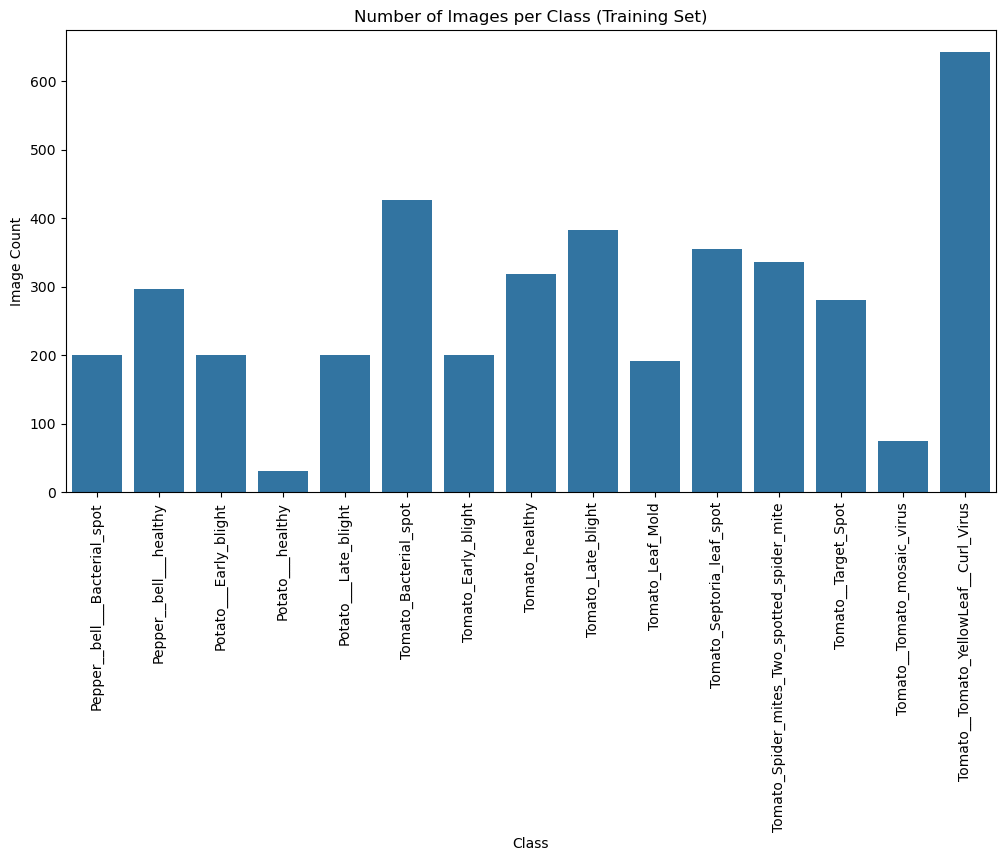

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=list(class_counts.keys()),
    y=list(class_counts.values())
)
plt.xticks(rotation=90)
plt.title("Number of Images per Class (Training Set)")
plt.ylabel("Image Count")
plt.xlabel("Class")
plt.show()


## 📈 Class Distribution Visualization

A bar chart is used to visualize:
- Number of images per class
- Balance between different disease categories


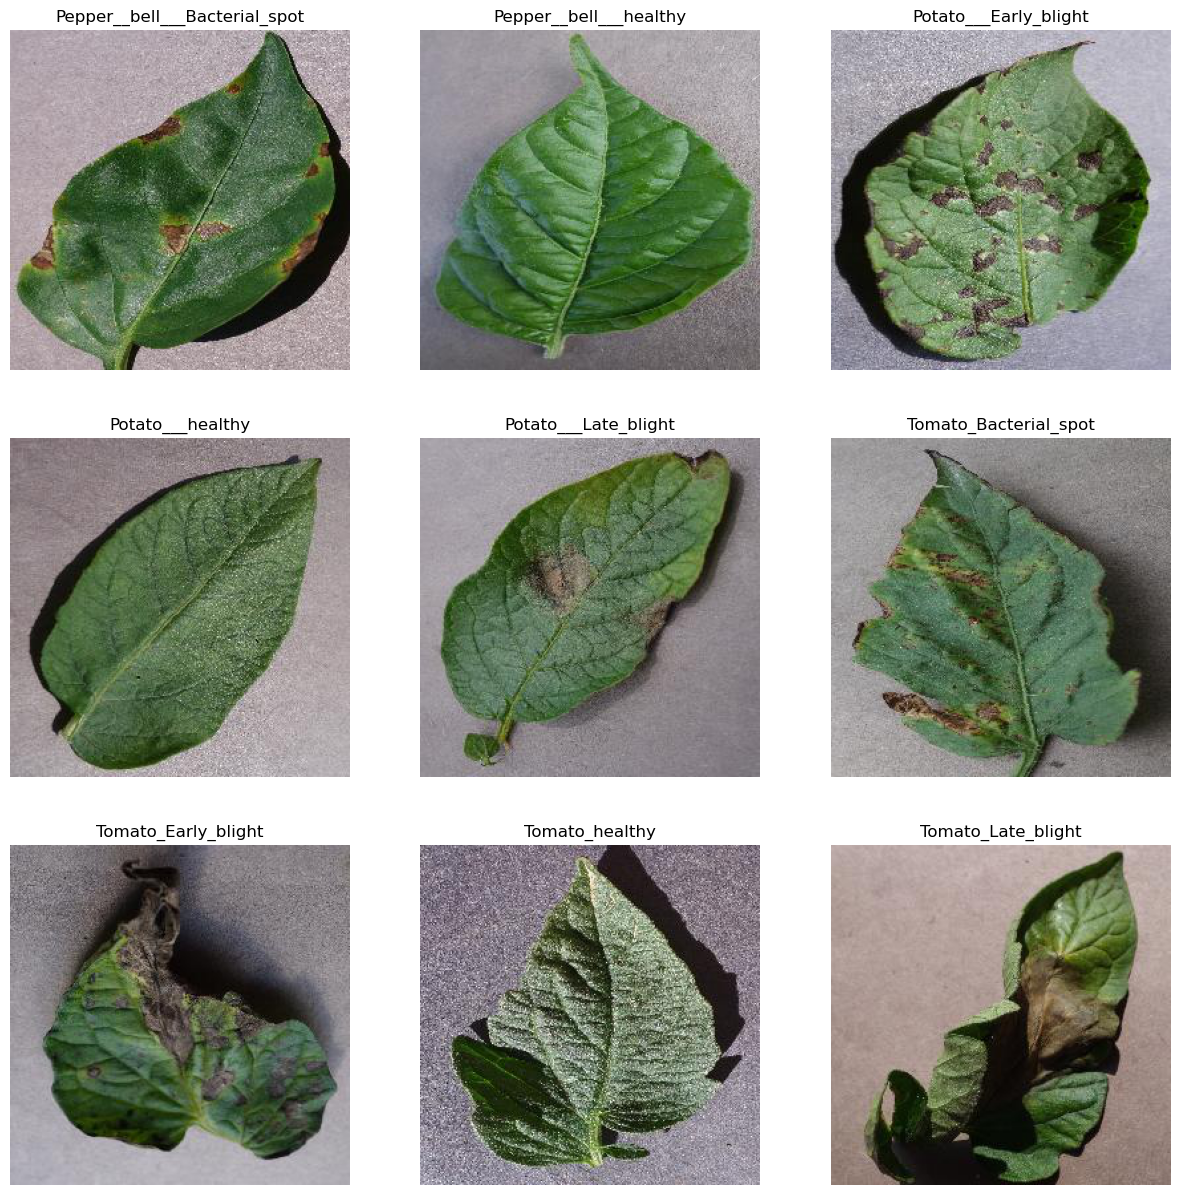

In [6]:
plt.figure(figsize=(15, 15))

for i, class_name in enumerate(classes[:9]):
    class_path = os.path.join(TRAIN_DIR, class_name)
    img_name = os.listdir(class_path)[0]
    img_path = os.path.join(class_path, img_name)

    img = Image.open(img_path)

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.show()


## 🖼️ Sample Images from Each Class

This section displays sample images to:
- Visually inspect infected and healthy leaves
- Understand color, texture, and shape variations


In [7]:
widths = []
heights = []

for class_name in classes:
    class_path = os.path.join(TRAIN_DIR, class_name)
    for img_name in os.listdir(class_path)[:20]:  # sample
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        w, h = img.size
        widths.append(w)
        heights.append(h)

print("Average Width:", np.mean(widths))
print("Average Height:", np.mean(heights))


Average Width: 256.0
Average Height: 256.0


## 📐 Image Size Analysis

We analyze image dimensions to:
- Identify variation in width and height
- Decide the standard image size for resizing


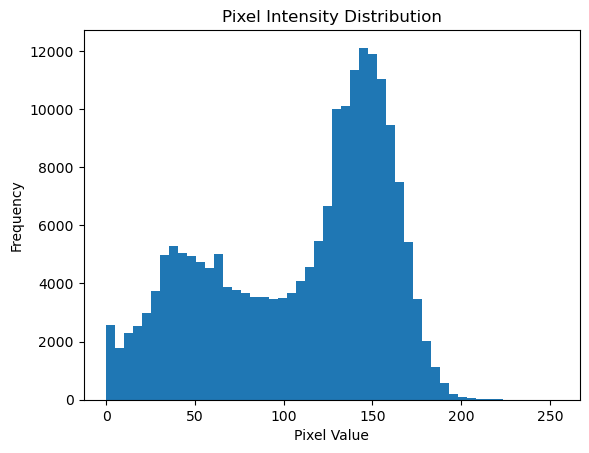

In [8]:
img = Image.open(img_path)
img_array = np.array(img)

plt.hist(img_array.ravel(), bins=50)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


## 🎨 Pixel Intensity Distribution

Pixel intensity values are analyzed to:
- Understand brightness and contrast
- Justify pixel normalization (scaling values between 0 and 1)


## 📝 EDA Summary and Observations

### Key Findings:
- The dataset consists of multiple plant leaf disease categories
- Images are labeled using folder names
- Image sizes vary across classes
- Pixel values range from 0 to 255

### Preprocessing Required:
- Image resizing
- Pixel normalization
- Data augmentation to improve generalization
